Final Project- Allison Dalton and Jason Gustafson

Professor: Nathan Carter

Class: MA346

For this project we want to take a look at the "duck curve" that is present in electricity consumption.  
The cruve reperesents a 24 hour snapshot of electricity consumption throughout the day.
It is important to understand how energy use is used throughout the day as society shifts towards renewable energies, especially solar power. 
This curve was found in California as they have decided to make solar a major energy provider.
The curve demonstrates that energy is not needed during some hours, which tend to be the sunniest hours.
Discovering hours of energy usage is key to understanding the type of solutions needed to switch to renewable energy.
Either solar power must be stored during peak production and low usage to save for later or a different energy source must be used.

The electricity data is sourced from EIA (Energy Information Administration), and the weather data is sourced from DarkSky. The dataset contains data starting in July 2018 until May 2020, providing approximately 24 months of hourly observations.

We are going to use the data regarding the three cities in Texas: Dallas, San Antonio, and Houston. 

This source can be found here: https://www.kaggle.com/shubhamkulkarni01/us-top-10-cities-electricity-and-weather-data?select=cleaned_texas_data.csv

First we are going to import the neccesary packages:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Now we will read in the CSV file into a date frame
We want to edit the time column to only include the hour and to then convert that hour to an integer.

Next we average each hour for all days by isolating hour then grouping by averaging them.


In [ ]:
df = pd.read_csv("/home/jovyan/work/cleaned_texas_data.csv")
df['time']=df['date'].str[11:13]
df['time'] = df['time'].astype(int)
df= df.groupby(['time']).mean()
df

,houston,san antonio,dallas
time,,,
0,11585.210916,6505.410642,12886.616696
1,10709.559040,5914.388919,11814.195407
2,10324.641382,5619.348352,11308.814558
3,10087.482220,5446.396098,11024.581890
4,9974.345261,5359.010656,10901.357339
5,10058.644143,5399.740474,11047.066525
6,10430.372163,5666.682139,11598.411652
7,10949.772248,6113.636476,12484.077959
8,11203.063609,6342.691738,12961.199016


This dataframe places each hour of the day as its row and the Texas cities as the column, with the amount of electricity used each hour as the values.

To make the data easier to use, we will make a new dataframe that is the trasposed version of our orginal.

In [ ]:
df_transposed = df.transpose()
df_transposed

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
houston,11585.210916,10709.559040,10324.641382,10087.482220,9974.345261,10058.644143,10430.372163,10949.772248,11203.063609,11555.271786,...,13480.764204,13631.035905,13708.289271,13711.287108,13662.184289,13494.989247,13250.509137,13036.741300,12625.300182,11972.997813
san antonio,6505.410642,5914.388919,5619.348352,5446.396098,5359.010656,5399.740474,5666.682139,6113.636476,6342.691738,6465.735796,...,7350.388420,7506.827217,7647.264313,7785.487266,7922.818469,7997.349490,7876.913755,7710.144617,7403.127801,6898.541871
dallas,12886.616696,11814.195407,11308.814558,11024.581890,10901.357339,11047.066525,11598.411652,12484.077959,12961.199016,13243.094423,...,14833.605249,15005.275784,15141.271422,15321.438117,15529.633767,15588.297436,15324.232722,15037.417060,14507.684581,13573.289538


The new dataframe places the cities as the rows and each hour as the columns, making it easier for one to read and analyze.

First, we will import the curve fit tool from scipy to optimize our function given our data.

This curve is a simple polynomial that is able to produce, given certain beta values, the shape that is seen in the duck curve.
This features four relative maxes/minimums that would be determined given the beta values.



In [ ]:
# import curve-fitting tools
from scipy.optimize import curve_fit

# logistic curve function in Python
def duck_curve ( x, B0, B2, B3, B4, B5 ):
    return B5*x**5 + B4*x**4 + B3*x**3 + B2*x**2 + B0

There were no errors so we now have a function with our duck curve function.


Next we will make a function for getting the electricity usages for a given city by utilizing our transposed dataframe.

In [ ]:
def electricity_in_city ( city ):
     return df_transposed.loc[city,:]

There were no errors so the function was made succesfully.

Below is a function that will feed the data for a given city into the function to optimize the beta values. We give the curve guessed values so scipy can better find values for our dataset. We also use a try/except statement in case there are any values that curve fit does not work for. These values will be a "not a number."
The fuction will return the five beta values, in a dataframe organized by each city, that will make up our duck curve.

In [ ]:
def beta_calc(city):
    # compute the xs and ys for the data i want to plot and fit
    ys = electricity_in_city( city )
    xs = np.arange(len(ys))
    my_guessed_betas = [ 5,5,5,5,5 ]
    try:
        found_betas, covariance = curve_fit( duck_curve, xs, ys, p0=my_guessed_betas )
        B0, B2, B3, B4, B5 = found_betas
    except:
        B0, B2, B3, B4, B5 = np.nan, np.nan, np.nan, np.nan, np.nan
    data={'City': [city], 'B0':[B0], 'B2':[B2], 'B3':[B3],'B4':[B4],'B5':[B5], }
    df_betas = pd.DataFrame(data)
    df_betas.set_index('City')
    return df_betas

No output means that the function was created without error.

Our next step is to put the cities from the transposed dataframe will be in a list.
Next, each beta will be calculated for the three cities and put into one unified dataframe.

In [ ]:
list_cities = df_transposed.index.tolist()

state_beta = [beta_calc(i) for i in list_cities]
df_betas_concat = pd.concat(state_beta)
df_betas_concat = df_betas_concat.set_index('City')
df_betas_concat

,B0,B2,B3,B4,B5
City,,,,,
houston,10757.274744,-78.334289,17.478058,-1.040139,0.018851
san antonio,5855.193705,-27.182777,6.140523,-0.331438,0.005220
dallas,11677.807557,-36.951223,10.563698,-0.631768,0.010879


As seen from the output, this dataframe has our three cities as the rows and the 5 betas as columns with values for each of them.

Next, we want to make a new function that takes the city name, which will be either Houston, San Antonio, or Dallas, as its input. This function's purpose is to make 2 overlapping graphs, one line plot and one scatterplot, based on the betas that our curve fit found.

To make this graph, we first want the x-axis to have a range of 24, representing 24 hours of the day. 

Next, we will define 5 betas based on the 5 betas that we found for each city. To do this, we will utilize our dataframe, df_betas_concat, that we just made, and use the input of 'city' to find the 5 betas respectively.

Once these betas are defined, we define our y-axis of the scatter plot, called y_org, to be the actual datapoints from our original CSV file. The y-axis of the line graph will be our duck curve line. Our x-axis will be time, in hours, for both graphs. By have the same x-axis and different y-axes, we will be able to see the difference in the actual datapoints and the curve fit line to see how accurately it projects the data.

In [ ]:
def creating_graph(city):
    x = np.arange(24)
    B0 = df_betas_concat.loc[city]['B0']
    B2 = df_betas_concat.loc[city]['B2']
    B3 = df_betas_concat.loc[city]['B3']
    B4 = df_betas_concat.loc[city]['B4']
    B5 = df_betas_concat.loc[city]['B5']

    y_org = df[city].tolist()
    y = B5*x**5 + B4*x**4 + B3*x**3 + B2*x**2 + B0
    plt.plot(x,y)
    plt.scatter(x,y_org, color='green')
    plt.title('Daily Electricity Consumption of '+ city)
    plt.ylabel('Electricity Usage (Megawatt-Hours)')
    plt.xlabel('Daily Hour (military time)')
    return plt.show()


We returned the actual graph, and since there are no errors we know it ran succesfully.

We then want to utilize our creating_graph function and apply it to the three Texas cities that we have data from in our CSV file.

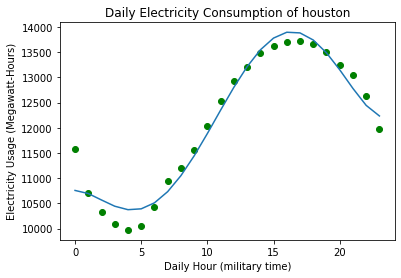

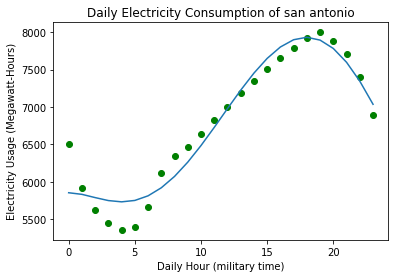

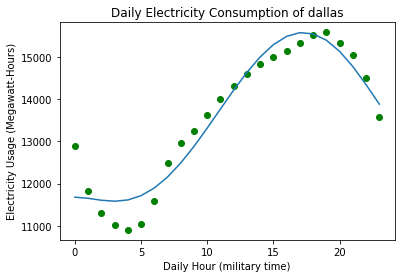

In [ ]:
creating_graph('houston')
creating_graph('san antonio')
creating_graph('dallas')

As seen from the output, we have three plots that overlay two graphs on each: the duck curve with the betas and the actual data points(in green). As we can see, the curve fit did an excellent job fitting to the data points. For the most part, each city's curve fit lines up well to the actual data points and allows us to confirm that the data fits with our duck curve line that we made.